In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
url='http://bit.ly/drinksbycountry'

In [147]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [148]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [149]:
data=pd.read_csv('/Users/geethuvishnu/Downloads/beer-servings.csv')

In [150]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [151]:
data=pd.read_csv('/Users/geethuvishnu/Downloads/beer-servings.csv',index_col='Unnamed: 0')

In [152]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [153]:
data.shape

(193, 6)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [155]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# Missing Values

In [156]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [157]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [158]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [159]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [160]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

# Simple Imputer

In [161]:
from sklearn.impute import SimpleImputer

In [162]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')# created an instance of Simple Imputer
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols) 

In [163]:
type(num_cols)

numpy.ndarray

In [164]:
num_cols = pd.DataFrame(num_cols,columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]) # will lose the column name so need to specify the column names.

In [165]:
num_cols.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [166]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [167]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],inplace=True,axis=1)
# Inplace =True : to reflect the change in the orginal data.
# Dropping the columns of orginal data to add the new data num_cols.
# specify axis otherwise will drop the rows.

In [168]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [169]:
data=pd.concat([num_cols,data],axis=1)

In [170]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [171]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

# Another Way

In [172]:
data=pd.read_csv('/Users/geethuvishnu/Downloads/beer-servings.csv',index_col='Unnamed: 0')

In [173]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [174]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

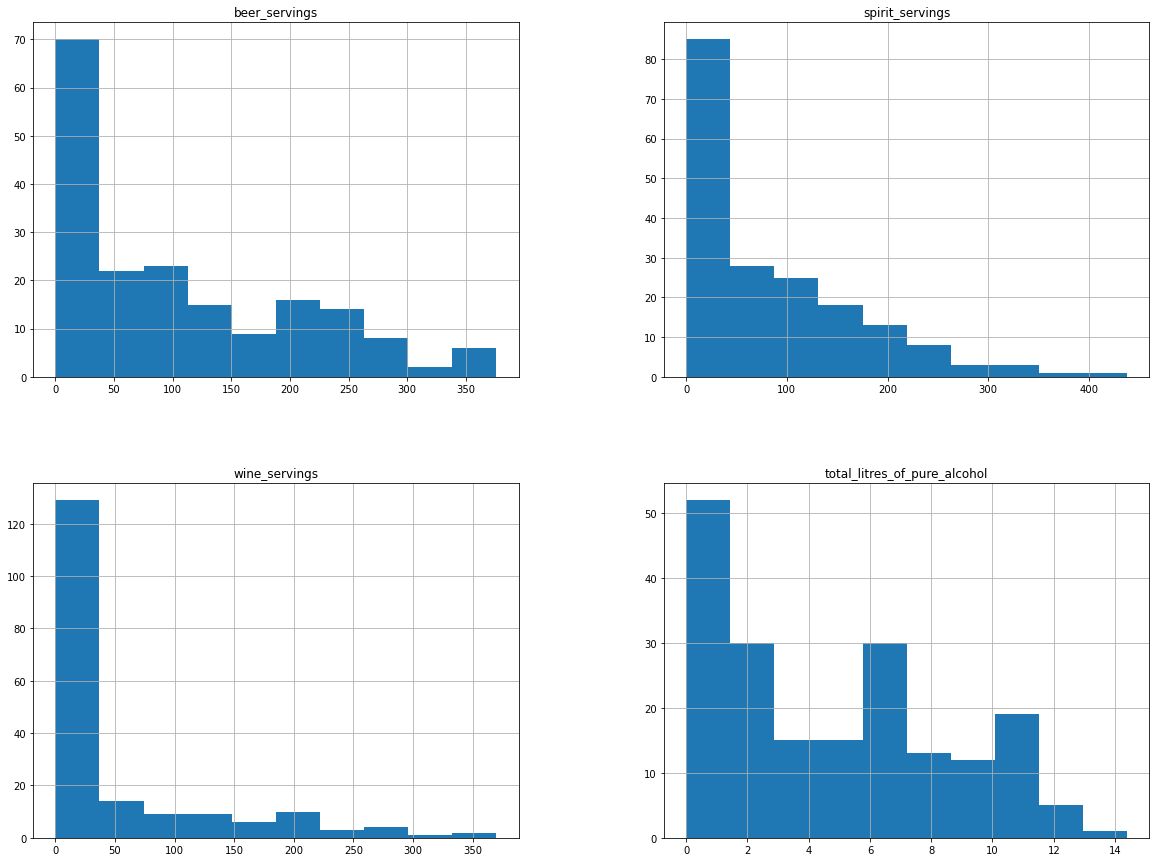

In [175]:
freqgraph=data.select_dtypes(include=['float'])# To know the skewness of data/measure of central tendency
freqgraph.hist(figsize=(20,15))
plt.show()

In [176]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [177]:
data[ 'beer_servings']=data[ 'beer_servings'].fillna(data[ 'beer_servings'].median())

In [178]:
for col in['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    data[col]=data[col].fillna(data[col].median())

In [179]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Outliers

Text(0.5, 1.0, 'beer servings')

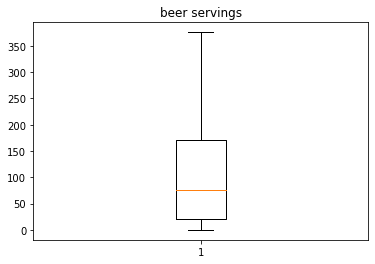

In [180]:
plt.boxplot(data['beer_servings'])
plt.title('beer servings')
# Here there are no outliers

In [181]:
# outliers : value above 99.7%
#Refer 65-95% rule
#q3+1.5*iqr ,q1-1.5*iqr are called outliers

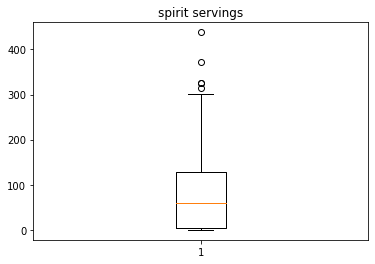

In [182]:
plt.boxplot(data['spirit_servings'])
plt.title('spirit servings')
plt.show()

In [183]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')
# interplolation= method used to calculate Q1

In [184]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [185]:
data['spirit_servings'].median()

60.0

In [186]:
IQR = Q3-Q1

In [187]:
IQR

123.0

In [188]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [189]:
low_lim  # Spirit_serving cannot be a negative value so we can neglect it

-179.5

In [190]:
up_lim

312.5

In [191]:
outliers=[]
for i in data['spirit_servings']:
    if (i>up_lim) or (i<low_lim):
        outliers.append(i)

In [192]:
outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [193]:
# Checking index of outliers
ind = data['spirit_servings']>up_lim
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [194]:
data.drop([15, 68, 73, 141, 144])  #.Dropping the rows of outliers

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,76.0,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


# Assignment

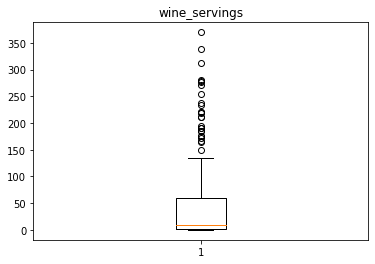

In [195]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')
plt.show()

In [196]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [197]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [198]:
data['wine_servings'].median()

9.0

In [199]:
IQR = Q3-Q1

In [200]:
IQR

58.0

In [201]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-86.0
146.0


In [202]:
outliers = []
for i in data['wine_servings']:
    if (i<low_lim) or (i>up_lim):
        outliers.append(i)

In [203]:
outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [204]:
# Checking index of the outliers
Ind = data['wine_servings']>up_lim
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

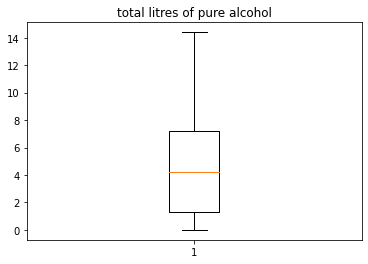

In [205]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('total litres of pure alcohol')
plt.show()
# Here we have no outliers